In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [51]:
df = pd.read_csv("../ks-projects-201801/ks-projects-201801.csv")

In [52]:
df = df.drop(df.index[20000:])

In [53]:
df1 = pd.get_dummies(df['state'])
df2 = pd.merge(df, df1, left_index=True, right_index=True)

In [54]:
df2.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,canceled,failed,live,successful,suspended,undefined
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.00000,1.978400e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9.543529e+08,3.743562e+04,1.021279e+04,104.82380,7.269650e+03,9.657101e+03,3.298461e+04,0.099350,0.522300,0.008100,0.355800,0.004500,0.009950
std,2.890876e+08,4.831207e+05,1.083815e+05,875.55497,8.885928e+04,1.060433e+05,3.802568e+05,0.299139,0.499515,0.089637,0.478767,0.066933,0.099255
min,1.061440e+05,1.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,7.500000e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.017217e+09,2.000000e+03,3.200000e+01,2.00000,2.000000e+01,3.287500e+01,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.044776e+09,5.000000e+03,6.200000e+02,12.00000,4.000000e+02,6.185700e+02,5.252090e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.072536e+09,1.600000e+04,4.056250e+03,55.00000,3.035000e+03,4.013250e+03,1.550000e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.101580e+09,4.000000e+07,8.596475e+06,64867.00000,8.596475e+06,8.596475e+06,3.300000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df2 = df2.drop("canceled", axis=1)
df2 = df2.drop("failed", axis=1)
df2 = df2.drop("live",  axis=1)
df2 = df2.drop("suspended",  axis=1)
df2 = df2.drop("undefined",  axis=1)
df2 = df2.drop("name", axis=1)
df2 = df2.drop("category", axis=1)
df2 = df2.drop("main_category", axis=1)
df2 = df2.drop("currency", axis=1)
df2 = df2.drop("deadline", axis=1)
df2 = df2.drop("launched", axis=1)
df2 = df2.drop("state", axis=1)
df2 = df2.drop("country", axis=1)
df2.head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,successful
0,1000002330,1000.0,0.0,0,0.0,0.0,1533.95,0
1,1000003930,30000.0,2421.0,15,100.0,2421.0,30000.00,0
2,1000004038,45000.0,220.0,3,220.0,220.0,45000.00,0
3,1000007540,5000.0,1.0,1,1.0,1.0,5000.00,0
4,1000011046,19500.0,1283.0,14,1283.0,1283.0,19500.00,0


In [56]:
df2.isnull().sum()

ID                    0
goal                  0
pledged               0
backers               0
usd pledged         216
usd_pledged_real      0
usd_goal_real         0
successful            0
dtype: int64

In [57]:
df2 = df2.fillna(0)

In [58]:
df2.isnull().sum()

ID                  0
goal                0
pledged             0
backers             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
successful          0
dtype: int64

In [59]:
estimator = LassoCV(normalize=True, cv=10)

sfm = SelectFromModel(estimator, threshold=1e-5)

In [60]:
train_label = df2["successful"]
train_data = df2.drop("successful", axis=1)

y = train_label.values
X = train_data.values

# fitで特徴選択を実行
sfm.fit(X, y)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=1e-05)

In [61]:
sfm.get_support()

array([False, False, False,  True, False, False, False])

In [62]:
removed_idx  = ~sfm.get_support()
train_data.columns[removed_idx]

Index(['ID', 'goal', 'pledged', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real'],
      dtype='object')

In [63]:
abs_coef = np.abs(sfm.estimator_.coef_)
abs_coef

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.75428434e-05,
       0.00000000e+00, 0.00000000e+00, 2.39307879e-08])

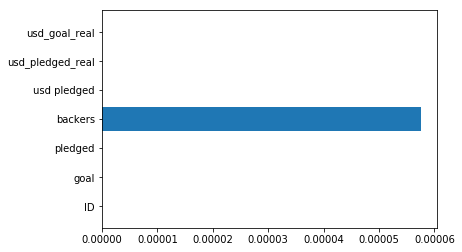

In [64]:
plt.barh(np.arange(0, len(abs_coef)), abs_coef, tick_label=train_data.columns.values)
plt.show()